# 來看一下 Cookie 存活率

In [3]:
from google.cloud import bigquery

client = bigquery.Client()
def query(sql):
    query_job = client.query(
        sql, 
        # Location must match that of the dataset(s) referenced in the query.
        location="US",
    )  # API request - starts the query
    
    df = query_job.to_dataframe()
    return df.cc.tolist()[0]

In [72]:
from datetime import datetime
from datetime import timedelta

start = datetime(year=2019,month=8,day=1)
start

datetime.datetime(2019, 8, 1, 0, 0)

In [73]:
day_string = []

for i in range(0,100):
    delta = timedelta(
        days=i
    )
    # Only days, seconds, and microseconds remain
    current = start + delta
    day_string.append(current.strftime("%Y%m%d"))

# 資料描述
* 以 20190801 的 cookie 做為 base
* 第一天就衰退了 75% 主要原因應該為手機會把 Cookie 給予清除掉

In [74]:
sqls = []
sql = """
SELECT
  count(distinct cookie_pta) as cc
FROM
  `pixnet-gt.pixinsight_data.article_visitor_log_1st_1_100_{0}`
where cookie_pta  in (
SELECT
  cookie_pta
FROM
  `pixnet-gt.pixinsight_data.article_visitor_log_1st_1_100_20190801`
GROUP BY
  cookie_pta
  
having count(1) < 50)

"""

for d in day_string:
    sqls.append(sql.format(d))


In [76]:
score = []
for s in sqls:
    cookie_num = query(s)
    score.append(cookie_num)

In [79]:
final_score = []
for s in score[1:]:
    final_score.append(s/score[0])

In [81]:

import matplotlib
print(matplotlib.matplotlib_fname())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


Populating the interactive namespace from numpy and matplotlib


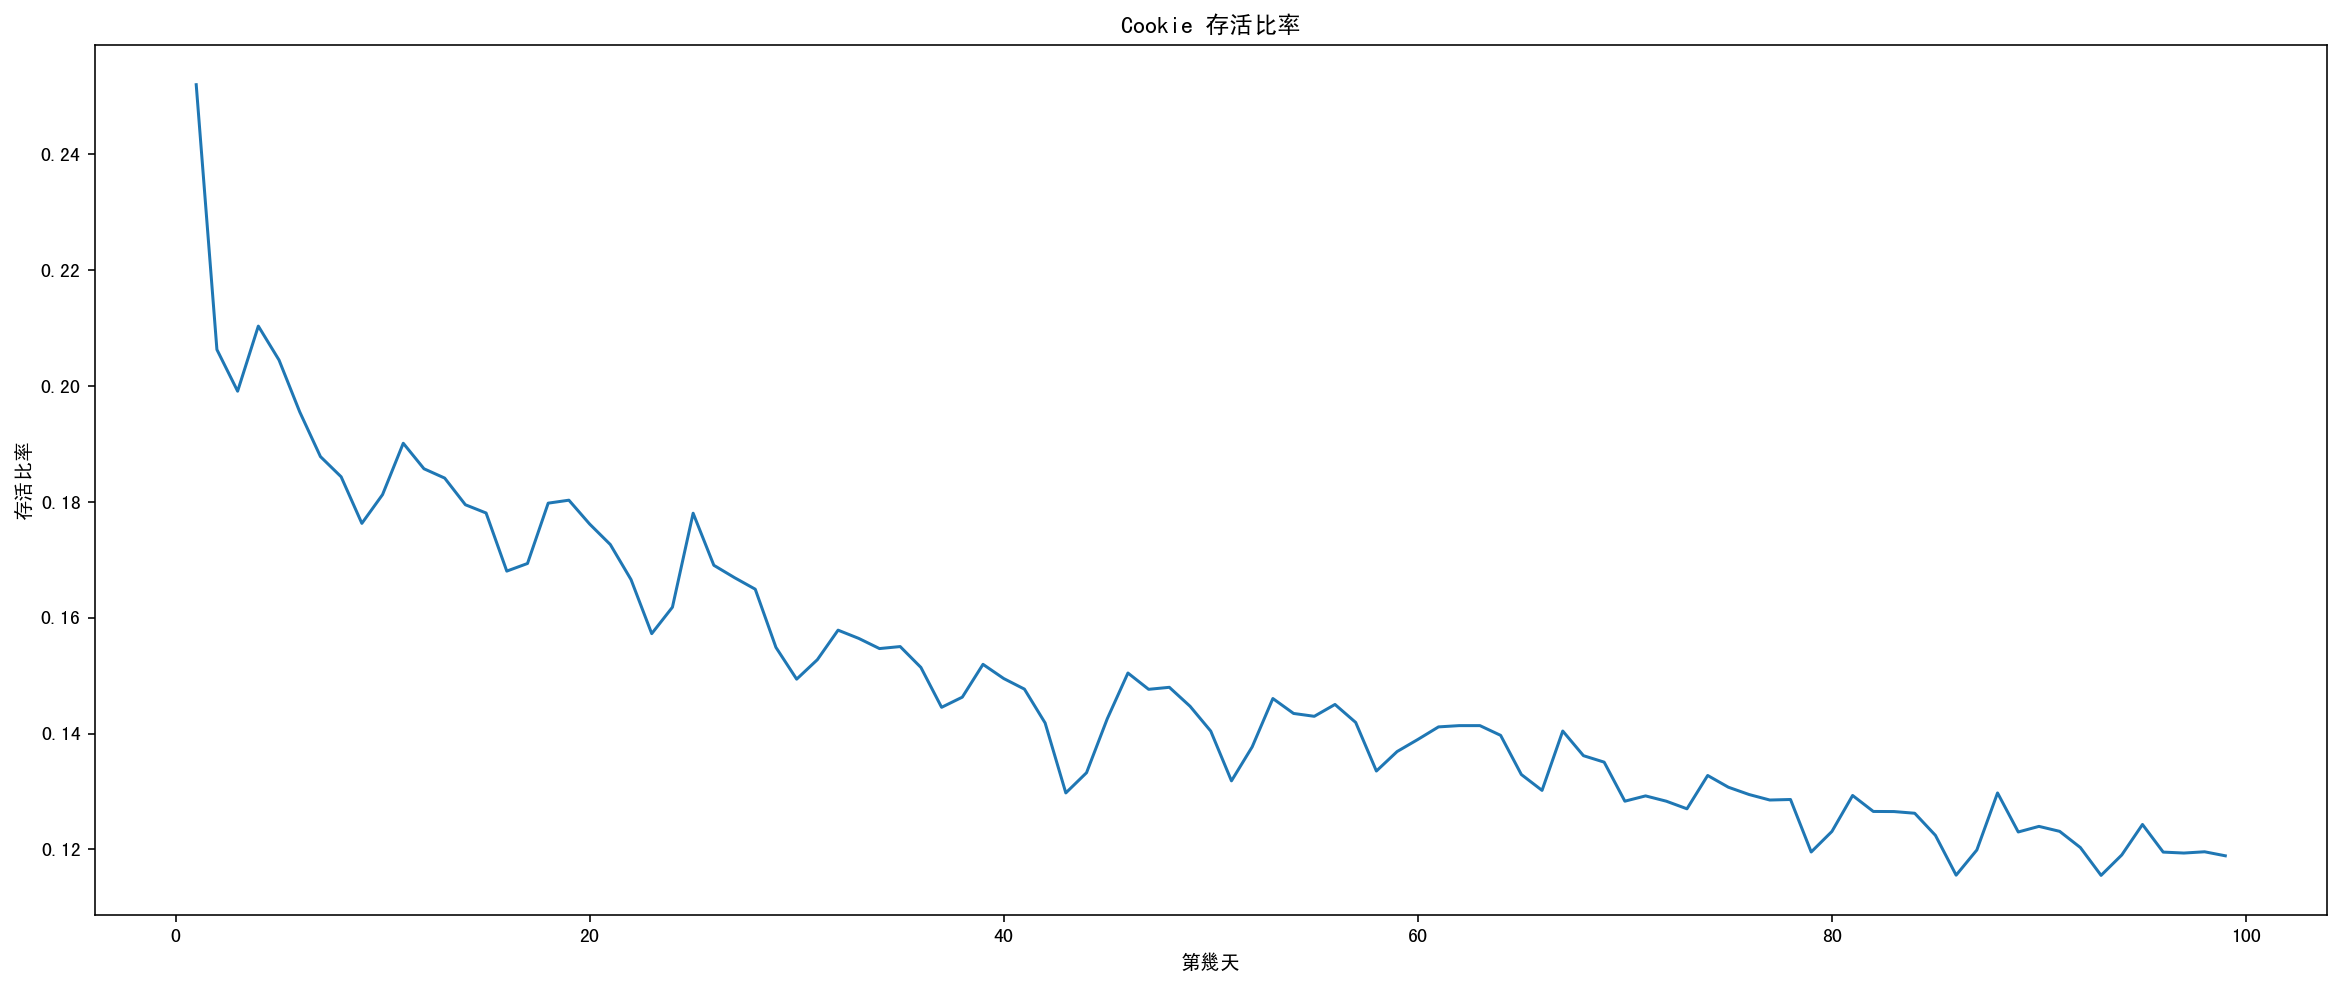

In [86]:
%pylab inline
plot(range(1,100),final_score )
plt.gcf().set_size_inches(20, 8)
plt.title(u'Cookie 存活比率', )
plt.ylabel(u'存活比率', )
plt.xlabel(u'第幾天', )
plt.tick_params(axis ='both', labelsize=10)
